<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#neXtSIM-4-kiwi" data-toc-modified-id="neXtSIM-4-kiwi-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>neXtSIM 4 kiwi</a></span><ul class="toc-item"><li><span><a href="#What-is-neXtSIM-?" data-toc-modified-id="What-is-neXtSIM-?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>What is neXtSIM ?</a></span></li><li><span><a href="#Test-builds-for-checking-consistency" data-toc-modified-id="Test-builds-for-checking-consistency-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Test builds for checking consistency</a></span></li></ul></li></ul></div>

# neXtSIM 4 kiwi


## What is neXtSIM ?

Sea-ice models, originally run on the Arctic by Norway team mainly

Can it be applied to Antarctic ?

- runs on personal computer --> use Docker
- runs on NZ clusters (or at least Cambridge for now!)
- validation tests for the different simulations

## Team

- **Rafa Santana** (Team Lead)
- Charlotte
- Chris
- Ivo 
- Kacper
- Martin 

## GitHub Organisation

https://github.com/ICCS-NextSim

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
import cmocean

from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc

from Utils import make_animation, time_series_plot

from IPython.display import HTML


In [12]:
#Open dataset
data = xr.open_dataset('Moorings_2018m01.nc')

# Extract a given variable
sit_output = data.sit.to_masked_array()
x = sit_output.data
#Get mask

mask = ma.getmaskarray(sit_output[0])
#Get time info
time = data.time.indexes['time']


What a simulation looks like without any atmospheric forcings ?

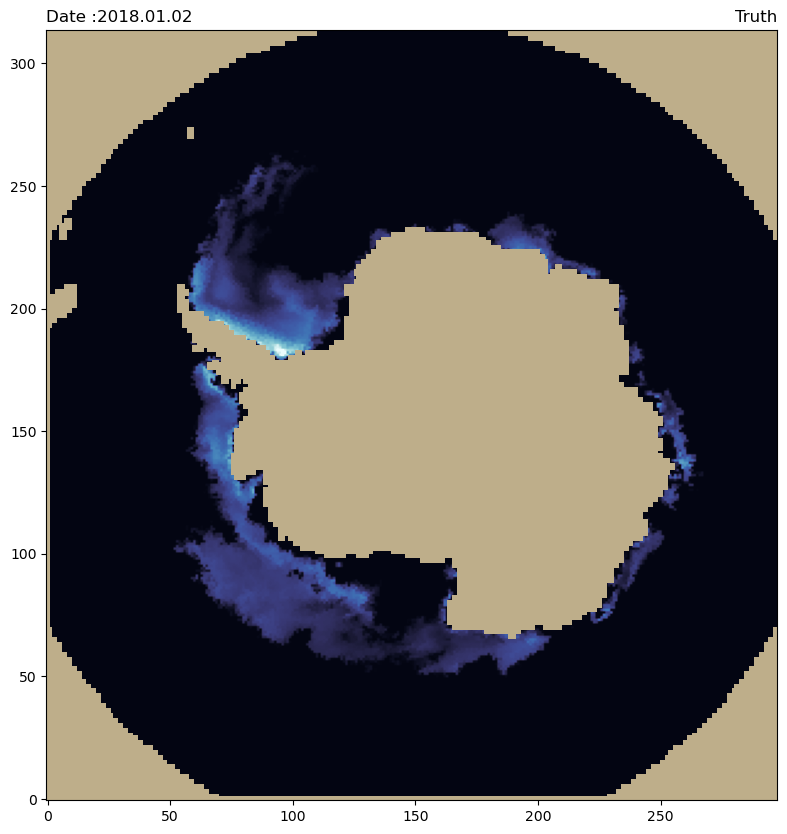

In [3]:
plt.rcParams['animation.ffmpeg_path'] = 'ffmpeg'
anim=make_animation(time=time , mask =1- mask, variable = sit_output)
FFwriter = animation.FFMpegWriter( fps = 3)

#Save animation 
anim.save('sit_no_atm.mp4', writer=FFwriter, dpi = 200)

In [5]:
HTML(anim.to_jshtml())

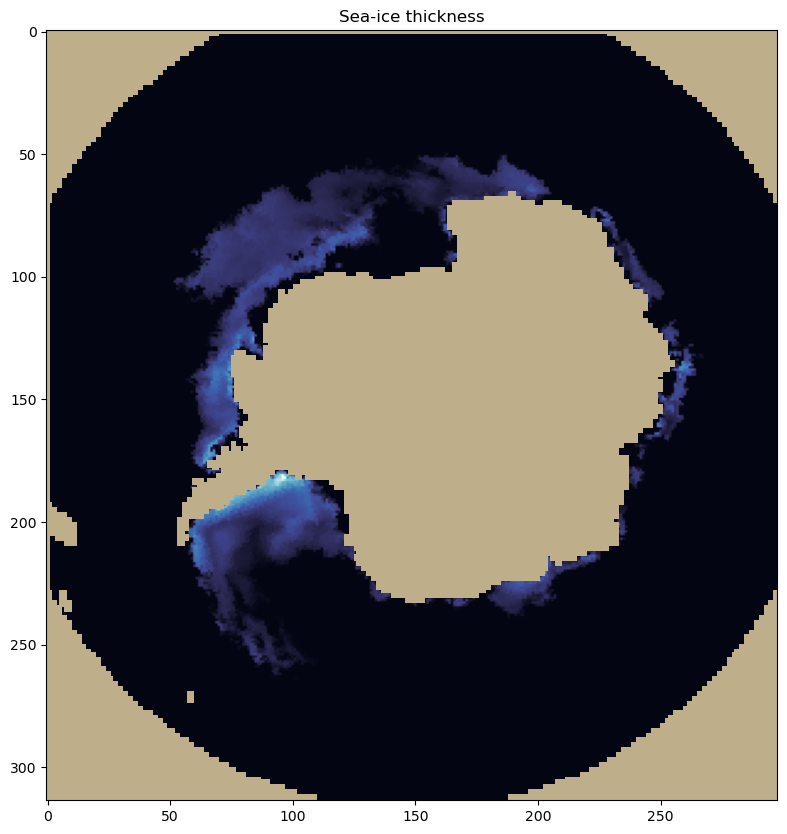

In [23]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

plt.imshow(ma.masked_array(sit_output[0], mask = mask), cmap = cmocean.cm.ice)
ax.set_facecolor('xkcd:putty')
plt.title('Sea-ice thickness')
plt.show()

## Test builds for checking consistency



In [29]:
import numpy as np
import xarray as xr

def output_comp(file1, file2, eps=1e-2):
    """
    Load a pair of netcdf model outputs and run a sequence
    of comparison tests.
    Parameters
    ----------
    file1 : str
        Filename of first model output
    file2 : str
        Filename of second model output
    eps : float
        Maximum relative error
    """

    data1 = xr.open_dataset(file1)
    data2 = xr.open_dataset(file2)

    fields = ["sit", "sic"]

    for i in range(len(fields)):
        assert np.nanmax(getattr(data1, fields[i]).data
                         - getattr(data2, fields[i]).data
                         ) < eps * np.nanmax(getattr(data1, fields[i]).data), fields[i] + " difference too large."

In [30]:
#nc_file = xr.open_dataset('Moorings_2018m01_thermal.nc')
#nc = nc_file.sel(time=slice('2018-01-02T03:00:00.000000000','2018-01-11T21:00:00.000000000'))
#nc.to_netcdf('Moorings_2018m01_thermal_short.nc')

PermissionError: [Errno 13] Permission denied: b'/Users/durandc/Desktop/ICCS_Summer_School/nextsim-cambridge-tools/Moorings_2018m01_thermal_short.nc'

In [27]:
#Compare the same dataset twice
output_comp('Moorings_2018m01.nc', 'Moorings_2018m01.nc')

In [31]:
#Compare two different dataset
output_comp('Moorings_2018m01.nc', 'Moorings_2018m01_thermal_short.nc')

AssertionError: sit difference too large.

## Running on Clusters

- Need to use singularity instead of Docker
- It is recommended to use the cluster's local MPI
  - Most are based on mpich
  - => we need to replace the MPI in the base docker (OpenMPI) image with one compatible with mpich

## Software Engineering

We:

- used GitHub
- set up an organisation
- had separate repositories for different compontnts of the project
- used the Boards to track TODO and work in progress

## Impact
Before today only Rafa had run NextSim on a docker container. 

Now several members of the team have run the simulation. 

We have converted the instructions from an email to a markdown format README that mutiple people can access

## Quality

We:

- had pull requests and these were reviewed
- did paring sessions